**Notes:** Press run, enter your preferred amazon product, and then enter your preffered # of topics: 





run in default mode (yes/no)
yes
run data collection? (yes/no)
yes
run topic model? (yes/no)
yes
enter your level (1-10)
HIGH GPU FOR LABELS>3
3
enter sleep time, .1s reccommended (3s for levels>10)
.1
enter your preferred # of topics for the topic model:
15
how many products would you like to analyze?
25
enter the product type / brand reviews you would like to analyze
starbucks coffee pods
petes coffee pods
folgers coffee pods
asics running shoes
nike running shoes
addidas running shoes
socony running shoes
under armor sweatpants
nike sweatpants
lululemon sweatpants
nike cleats
addidas cleats
under armor cleats
brita filter pitcher
pur filter pitcher
zerowater filter pitcher
sleep apnea mouthguard
sleep apnea nose strip
sleep apnea cpap machine
big k soda
coca cola soda
pepsi cola soda
ll bean boots
redwing boots
offbrand boots
length of product pages collected: 1
***TOPIC MODEL FOR XXXXX PRODUCT/BRAND***
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Un

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


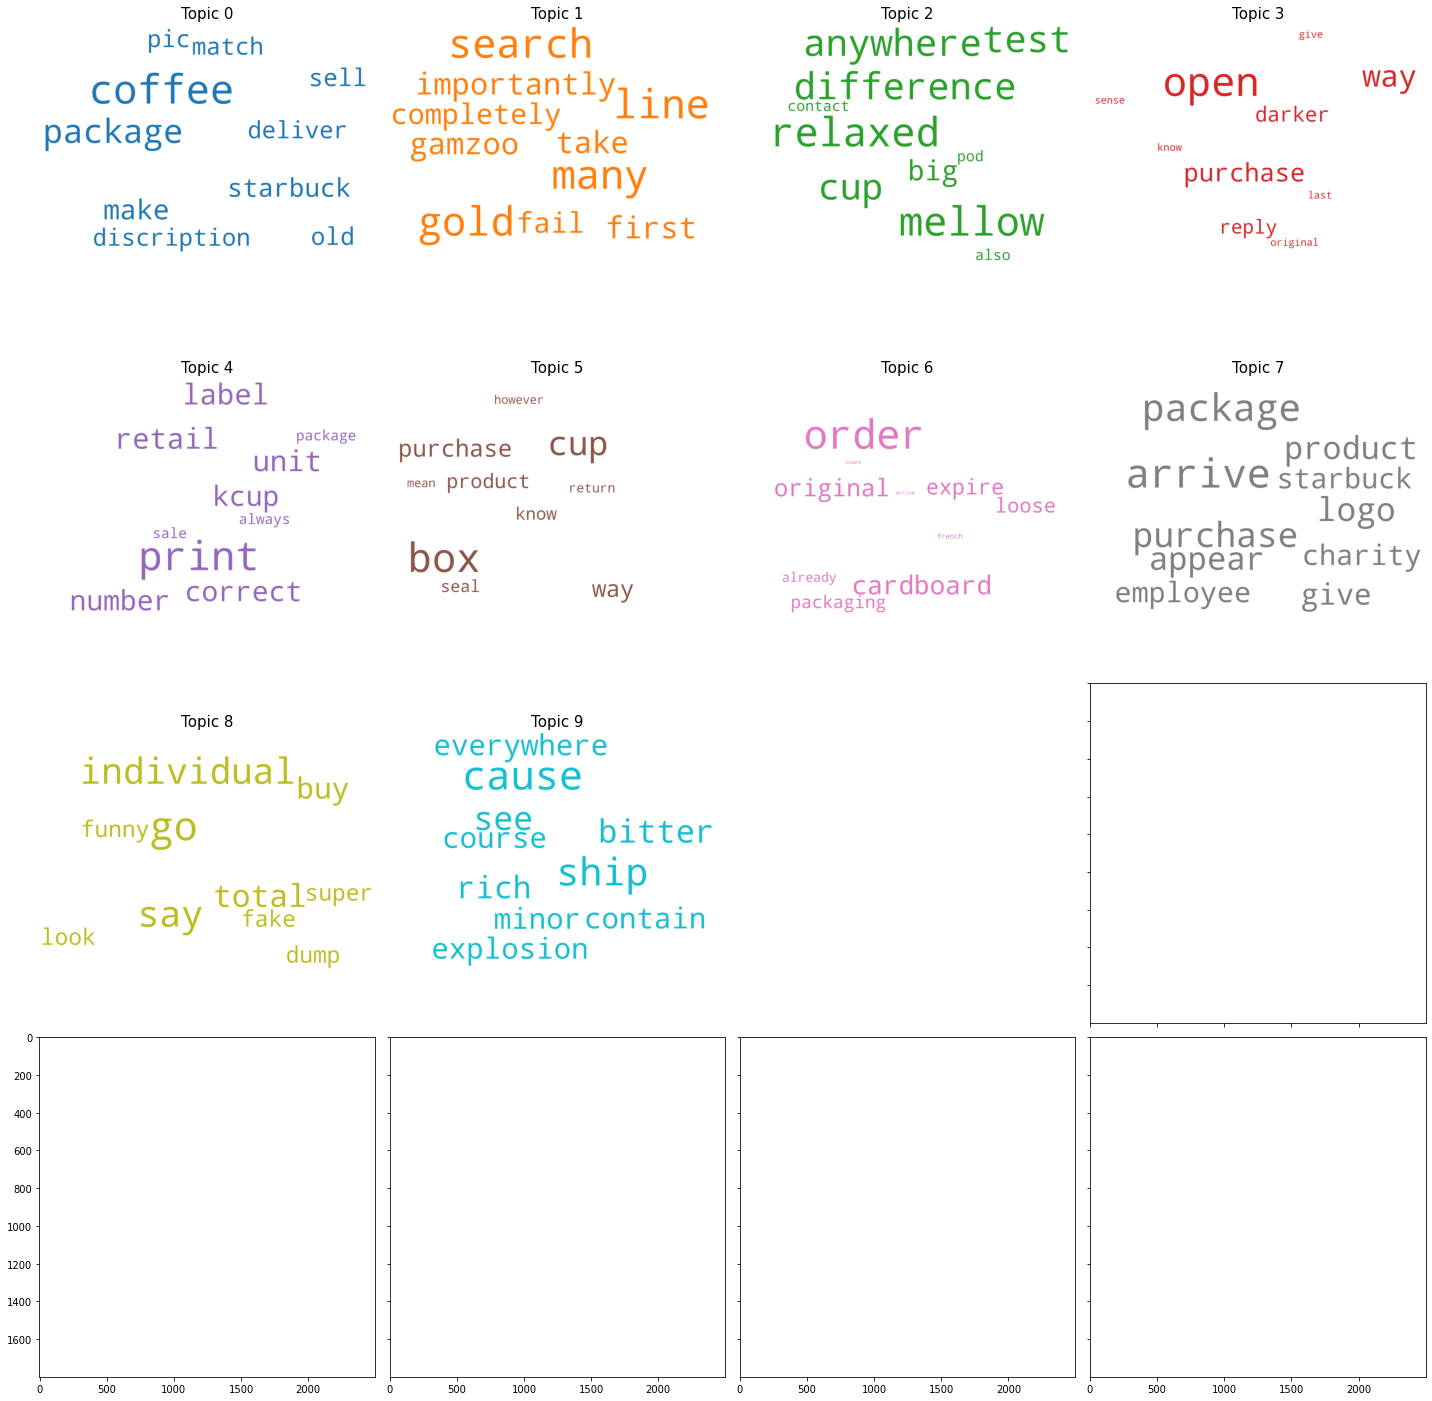

                                                                                                     reviews
0        this starbucks k-cup is a lighter caffeinated coffee and is a perfect first cup of coffee in the...
1        i'm concerned that these pods are counterfeit as they do not have the starbucks logo on them eve...
2          i'm concerned that these pods are counterfeit as they do not have the starbucks logo on them e...
3          from the description and the photo, you would think you were getting genuine starbucks coffee....
4          i love starbucks coffee but i have given this sale 1 star because they are selling out of date...
...                                                                                                      ...
3255459    starbucks french roast is still the best tasting coffee. it is the standard that all others tr...
3535543    coffee is all about preference. if you like a bolder flavor, i would 100% recommend this starb...
3535544    up until

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


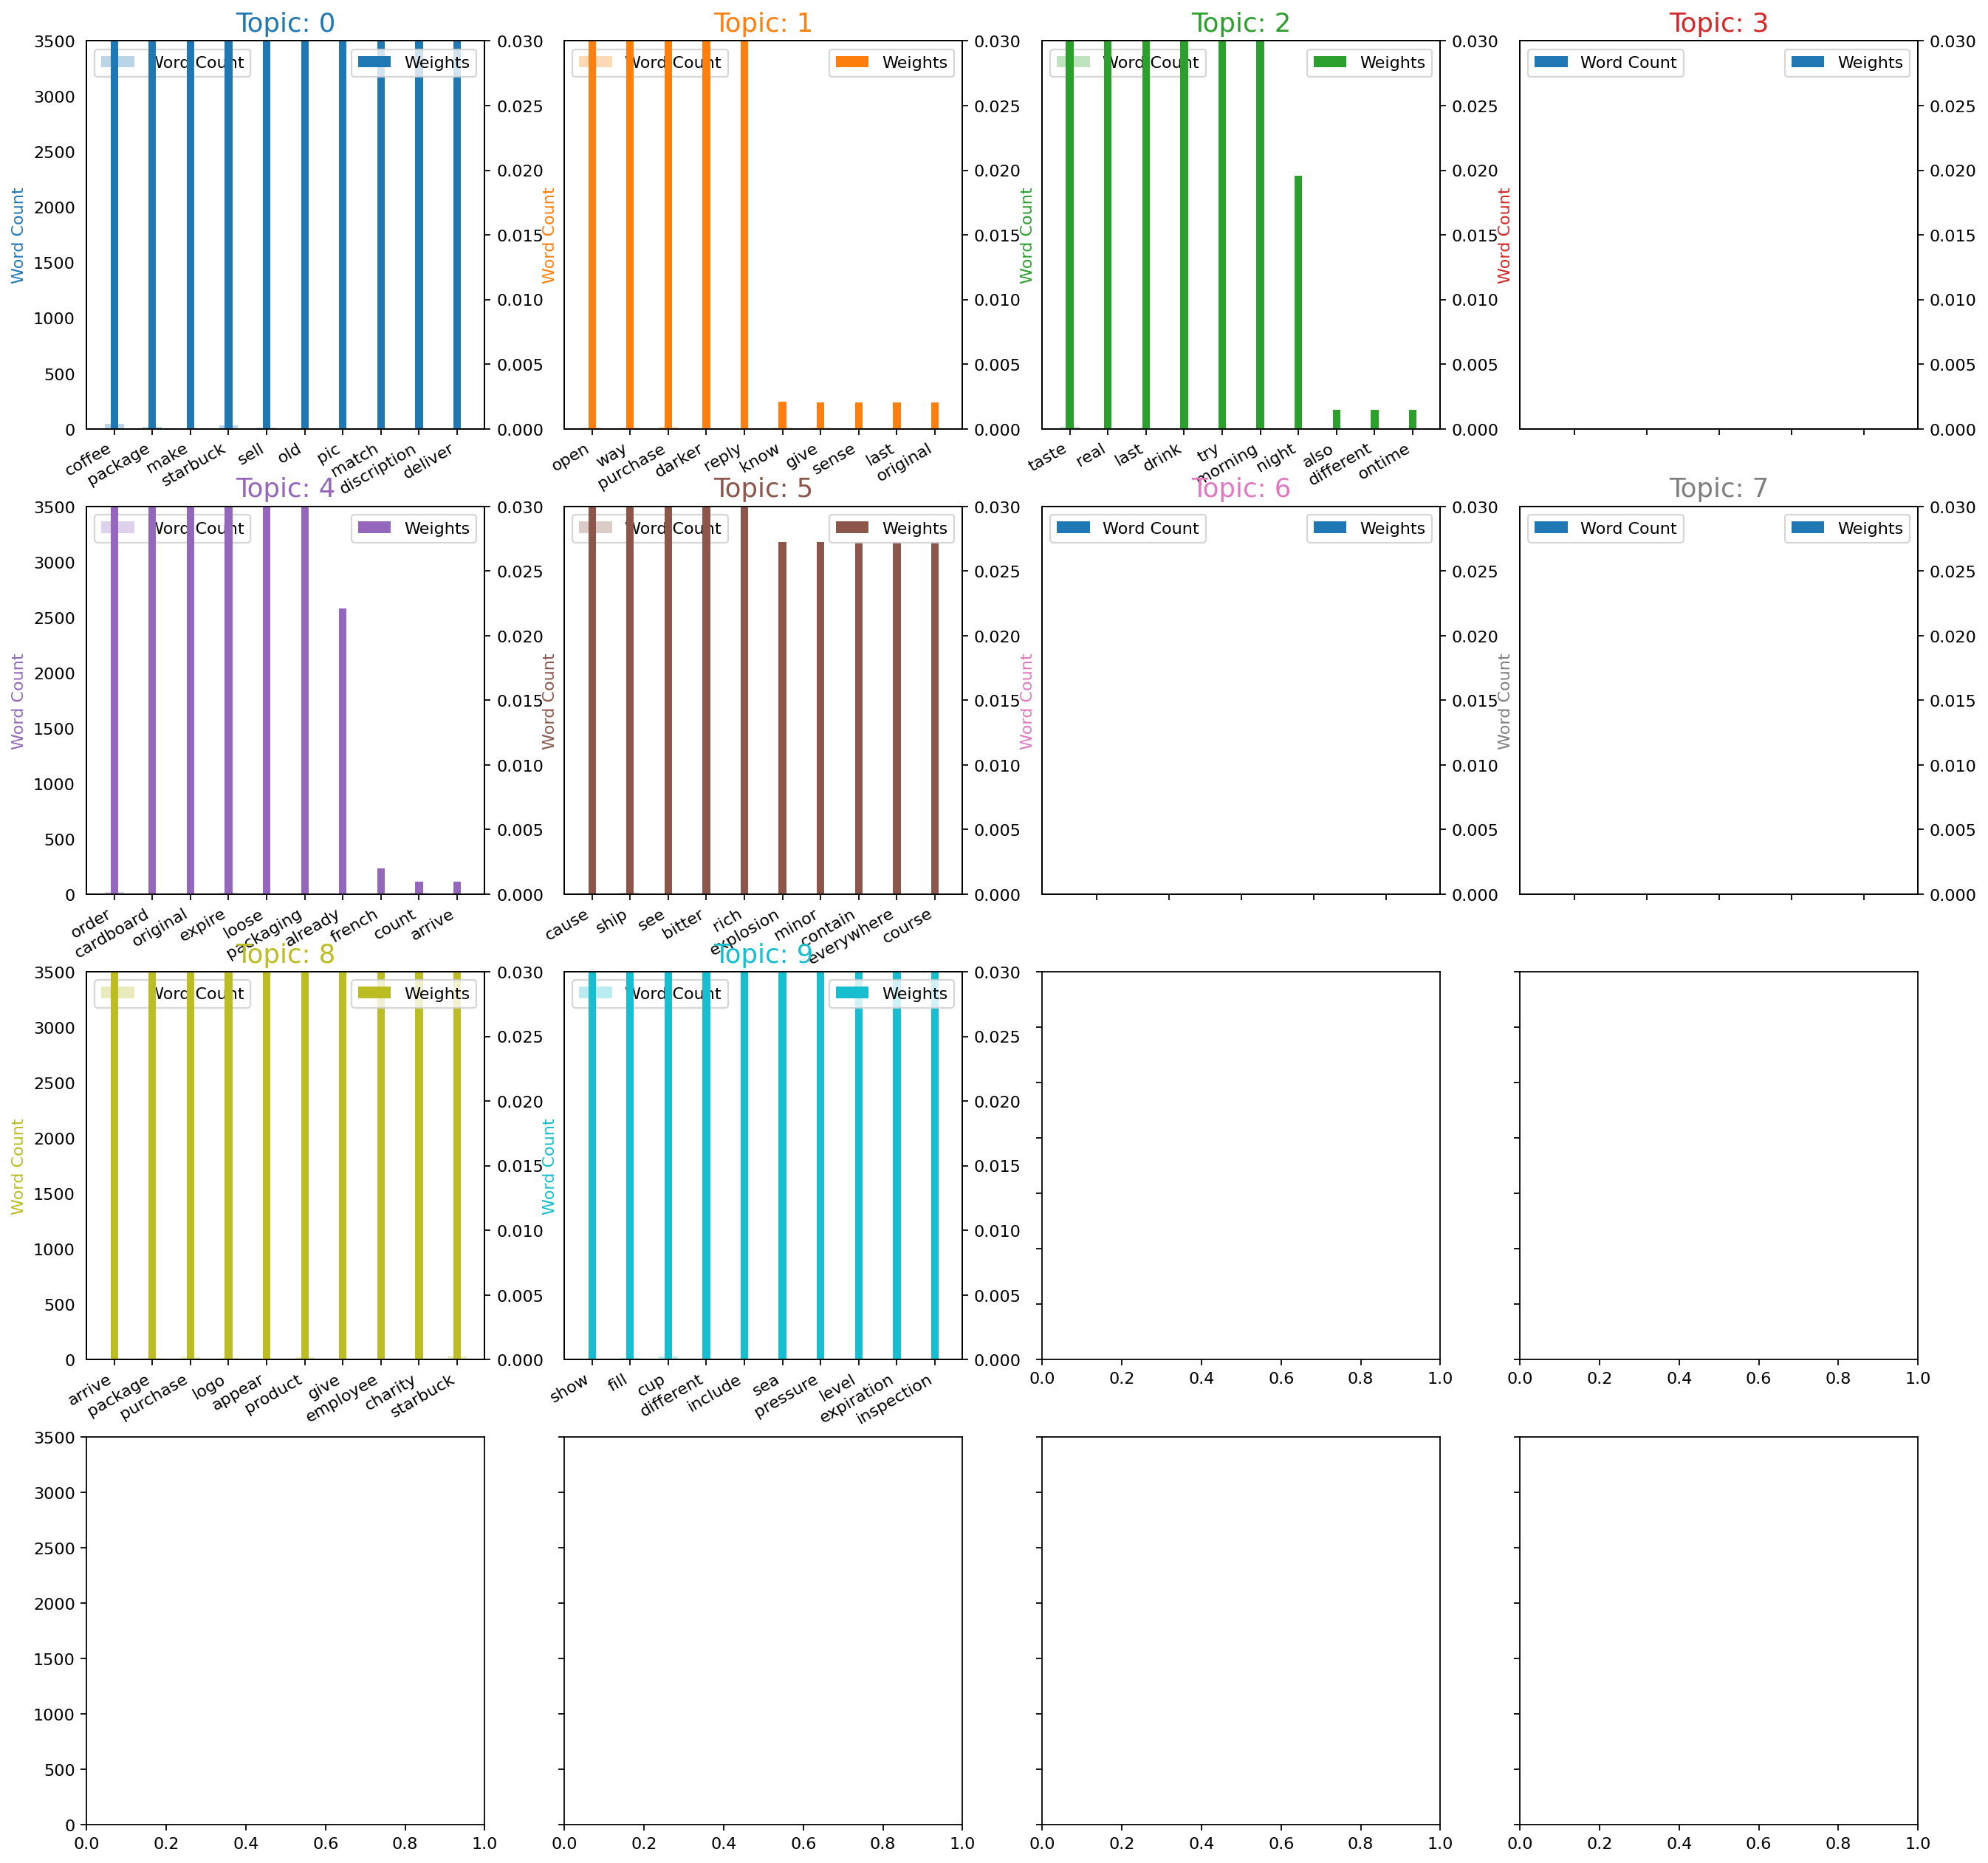

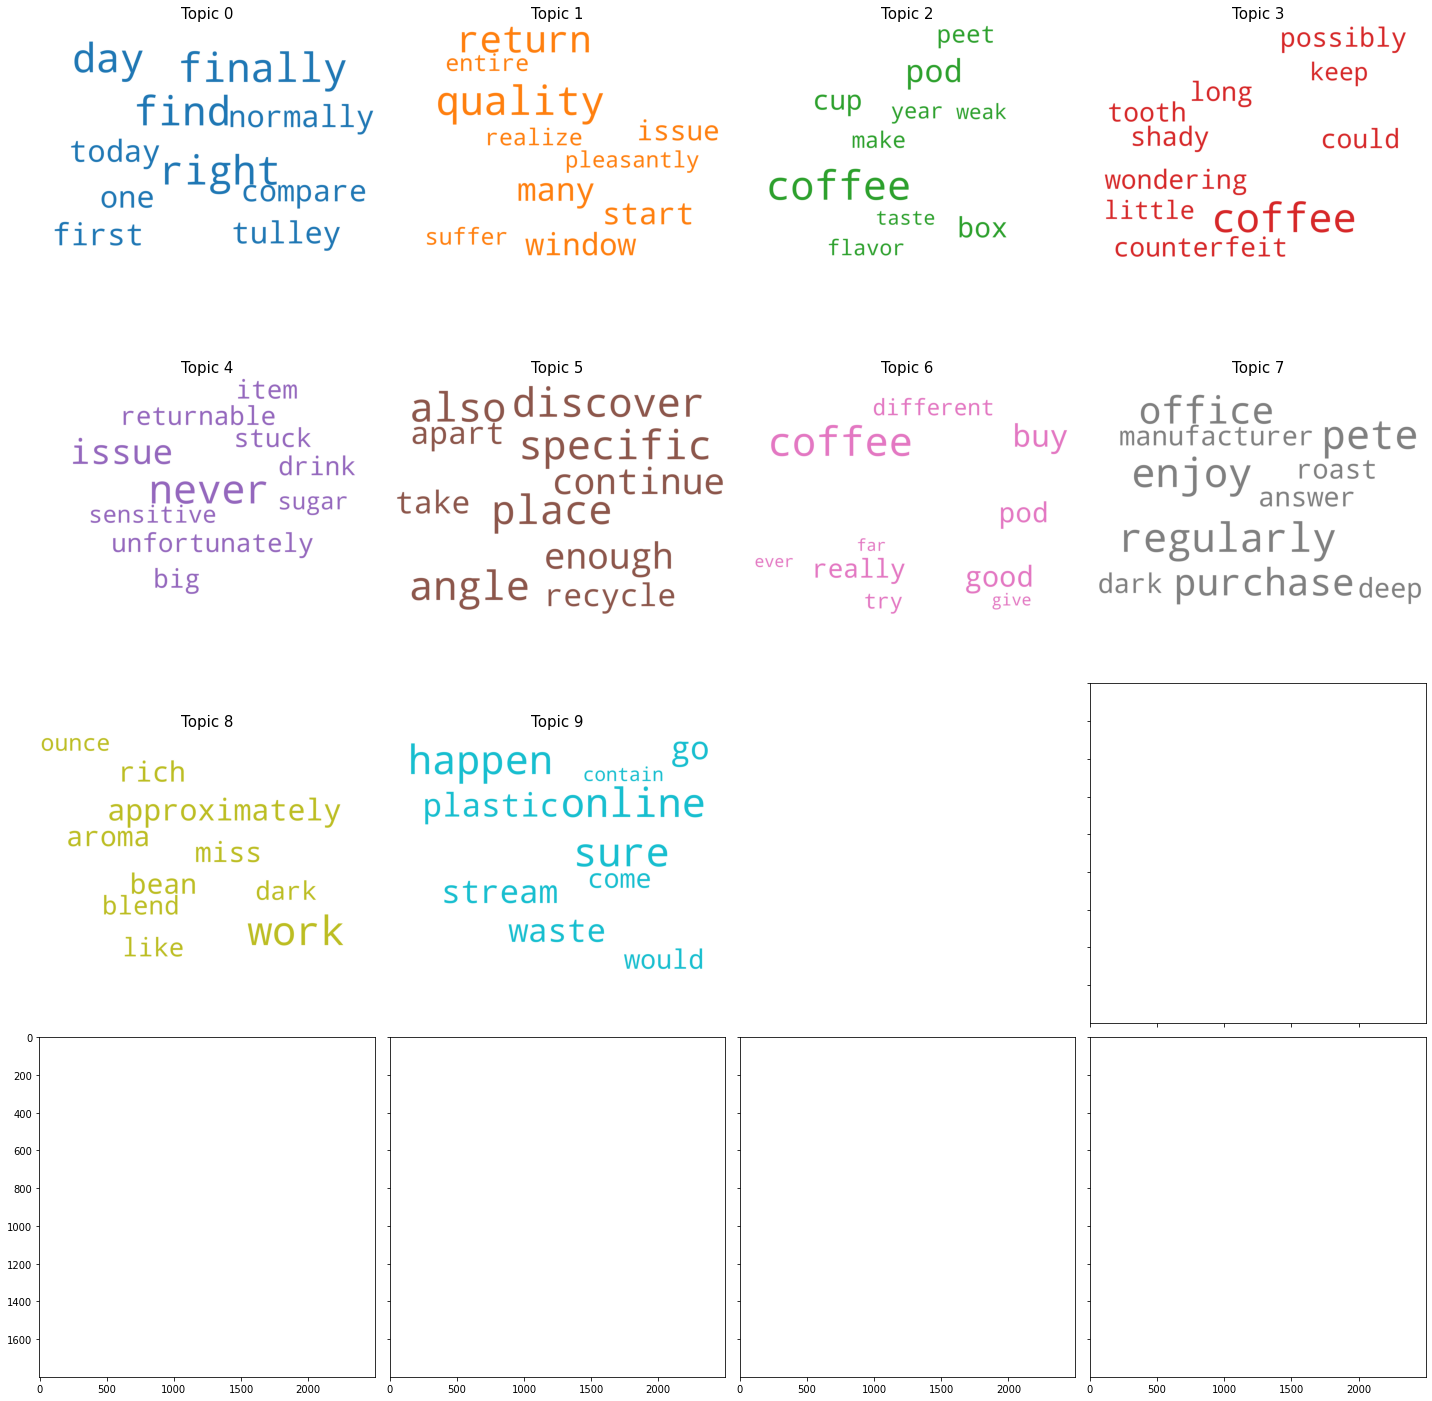

                                                                                                     reviews
0        ok, i don't like instant coffees or coffee machines, i prefer to steep my coffee in a french pre...
1        something a little shady about these, and i'm wondering if they could be counterfeit--or possibl...
2          ok, i don't like instant coffees or coffee machines, i prefer to steep my coffee in a french p...
3          edit: i’ll give this a few more cups chance, but this is terrible, flavorless coffee.i love pe...
4          i have tried many different k-cup coffees.  to me, most are weak and lack any flavor.  i espec...
5          something a little shady about these, and i'm wondering if they could be counterfeit--or possi...
6          i have no problem with the coffee. peet's french roast is my preferred k-cup coffee. it's stro...
7          this is by far, the best kcup pod coffee we have ever bought. we've become a fan of peet's in ...
8          we purch

In [ ]:
#PRODUCT SEARCH (BRAND V BRAND / SPECIFIC PRODUCTS)

#import packages 
import pandas as pd 
import numpy as np 
import requests 
import time 
import bs4
from bs4 import BeautifulSoup
import random
import re

#shared link: https://colab.research.google.com/drive/1LJoBqfg7phAfMmFsTX_-Ng0MPczdP7VS?usp=sharing

#set default
session_idd = '132-9175929-1227644'
tolkienn = 'gu6C9Yb70yHFXqCH2WhWeN4FaxjPCSK2ssod1fdqA0qmbDD/t7wjoA4EDgjPltkuzMfmYq+vquNLrS+kkXbVwcxpGbATWbY3jjctT8v2UUkCTham6oWMn0wwK0cm6LYvWFJpclM/K/XbAioFjW6Dd7OhZPVrTxN+aoKUBIvb2y1jAQiN1lmxcANxia/tnOUw'


print('run in default mode (yes/no)')
default = input().lower()
if default == 'yes':
  session_id = session_idd
  tolkien = tolkienn
  print('run data collection? (yes/no)')
  data_collection = input().lower()
  print('run topic model? (yes/no)')
  topicc_model = input().lower()
  print('enter your level (1-10)')
  print('HIGH GPU FOR LABELS>3')
  level =int(input())
  print('enter sleep time, .1s reccommended (3s for levels>10)')
  sleep_time = float(input())
  print('enter your preferred # of topics for the topic model:')
  xcv = int(input())
  print('how many products would you like to analyze?')
  num_its = int(input())
else:
  print('enter your token (paste)')
  tolkien = input()
  print('enter your session id')
  session_id = input()
  print('run data collection? (yes/no)')
  data_collection = input().lower()
  print('run topic model? (yes/no)')
  topicc_model = input().lower()
  print('enter your level (1-10)')
  level = int(input())
  print('enter sleep time, .1s reccommended (3s for levels>10)')
  sleep_time = float(input())
  print('enter your preferred # of topics for the topic model:')
  xcv = int(input())

its = {'its':[]}
print('enter the product type / brand reviews you would like to analyze')
for x in range(num_its):
  its['its'].append(str(input()))

its = pd.DataFrame(its)


for xe in range(len(its)):
  saver = {'review':[],'title':[],'verified':[],'text':[]}
  uu = {'text':[]}
  ccc = {'text':[]}
  cc = {'text':[]}
  saverr = {'links':[]}
  cust_rev = {'id':[],'name':[],'link':[]}
  reviews = {'name':[],'id':[]}

  if data_collection =='yes':
    level = level*3
    
    for xzx in range(1):
      url = 'https://www.amazon.com/s?k='+str(its['its'][xe])+':&page='+str(xzx)
      headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.83 Safari/537.36'}
      cookies = {'session-id':session_id,'session-id-time':'2082787201l','i18n-prefs':'USD','csm-hit':'tb:s-1KBXPV9W0G7AT013EMW9|1648478470844&t:1648478472672&adb:adblk_no','ubid-main':'132-0411939-8328406','session-token':tolkien}
      html = requests.get(url,headers = headers, cookies =cookies).text
      soup = bs4.BeautifulSoup(html, "html.parser")
      time.sleep(sleep_time)
      
      for tag in soup.findAll("div", {"class": "s-main-slot s-result-list s-search-results sg-row"}):
        xxxx = tag.findAll("a",{"class":"a-link-normal"})
        if len(xxxx)>=1:
          saverr['links'].append(xxxx)
        else:
          print(xxxx)
      print('length of product pages collected: '+str(len(saverr['links'])))
    from numpy.ma.core import exp
    for xc in range(len(str(saverr['links'][0]).split('" href="/'))):
      try:
        cust_rev['id'].append(str(saverr['links'][0]).split(';url=%2F')[xc].split('%2F')[2])
        cust_rev['name'].append(str(saverr['links'][0]).split(';url=%2F')[xc].split('%2F')[0])
      except:
        cvc = 2

    reviews = pd.DataFrame()
    reviews['id'] = pd.DataFrame(cust_rev['id']).drop_duplicates()
    reviews['name'] = pd.DataFrame(cust_rev['name']).drop_duplicates()
    reviews['link'] = pd.DataFrame(cust_rev['name']).drop_duplicates()
    reviews = reviews.reset_index().drop(columns = 'index')

    for xi in range(len(reviews)):
        reviews['link'].iloc[xi] = 'https://www.amazon.com/'+str(reviews['name'][xi])+'/product-reviews/'+str(reviews['id'][xi])+'/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'

    for xv in range(1):#len(reviews['link'])):
      for xvv in range(level*5):
          xvv = xvv+1
          html = requests.get(str(reviews['link'][xv])+'=all_reviews&pageNumber='+str(xvv),headers = headers, cookies =cookies).text
          soup = bs4.BeautifulSoup(html, "html.parser")
          time.sleep(sleep_time/2)




          for tag in soup.findAll("span", {"class": "a-size-base"}):
              xxxxx = tag.findNext().text
              if len(xxxxx)>=1:
                saver['text'].append(xxxxx)
              else:
                vvvv = 2

          for tag in soup.findAll("span", {"data-hook": "review-body"}):
              xxxxx = tag.findNext().text
              if len(xxxxx)>=1:
                saver['text'].append(xxxxx)
              else:
                vvvv = 2

          for x in range(len(saver['text'])):
            if len(str(saver['text'][x]).split())>=50:
              uu['text'].append(str(saver['text'][x]).lower())
            else:
              ff= 1
          for xx in range(len(uu['text'])):
            try:
              x = str(uu['text'][xx])
              cc['text'].append(re.sub('\n', '', x))
            except:
              fd = 2
          xt = 0

          #remove #'s to run below, filters out most updates / edits to posts, but takes a long time
          #try:
          for x in range(len(cc['text'])):
            #xt = xt+1 
            #if str(cc['text'][x]).split()[0] == 'edit:':
              #ttt = 1
            #elif str(cc['text'][x]).split()[0] == 'edit':
              #ttt = 1
            #elif str(cc['text'][x]).split()[1] == 'edit:':
              #ttt = 1
            #elif str(cc['text'][x]).split()[1] == 'edit':
              #ttt = 1
            #elif str(cc['text'][x]).split()[2] == 'edit:':
              #ttt = 1
            #elif str(cc['text'][x]).split()[2] == 'edit':
              #ttt = 1
            #elif str(cc['text'][x]).split()[3] == 'edit:':
              #ttt = 1
            #elif str(cc['text'][x]).split()[3] == 'edit':
              #ttt = 1
            #elif str(cc['text'][x]).split()[4] == 'edit:':
              #ttt = 1
            #elif str(cc['text'][x]).split()[4] == 'edit':
              #ttt = 1
            #elif str(cc['text'][x]).split()[0] == 'update:':
              #ttt = 1
            #elif str(cc['text'][x]).split()[0] == 'update':
              #ttt = 1
            #elif str(cc['text'][x]).split()[1] == 'update:':
              #ttt = 1
            #elif str(cc['text'][x]).split()[1] == 'update':
              #ttt = 1
            #elif str(cc['text'][x]).split()[2] == 'update:':
              #ttt = 1
            #elif str(cc['text'][x]).split()[2] == 'update':
              #ttt = 1
            #elif str(cc['text'][x]).split()[3] == 'update:':
              #ttt = 1
            #elif str(cc['text'][x]).split()[3] == 'update':
              #ttt = 1
            #elif str(cc['text'][x]).split()[4] == 'update:':
              #ttt = 1
            #elif str(cc['text'][x]).split()[4] == 'update':
              #ttt = 1
            #else:
              ccc['text'].append(cc['text'][x])
          #except:
            #dfs = 1

    df_reviews = pd.DataFrame()
    df_reviews['reviews'] = pd.DataFrame(ccc['text']).drop_duplicates()
    df_sentence_reviews = {'sentences':[],'review_num':[]}
    for xc in range(len(df_reviews['reviews'])):
      try:
        dd = str(df_reviews['reviews'][xc]).split('.')
        dd1 = str(df_reviews['reviews'][xc+1]).split('.')
        dd2 = str(df_reviews['reviews'][xc+2]).split('.')
        dd3 = str(df_reviews['reviews'][xc+3]).split('.')
        for x in range(len(dd)):
          df_sentence_reviews['sentences'].append(str(dd[x])+str(dd1[x])+str(dd2[x])+str(dd3[x]))
          df_sentence_reviews['review_num'].append(str(xc))
      except:
        dfgs = 1
    df_sentence_reviews=pd.DataFrame(df_sentence_reviews)
  else:
    print('no data collection')

  if topicc_model =='yes':
    print('***TOPIC MODEL FOR XXXXX PRODUCT/BRAND***')
    #TOPIC MODEL
    import pandas as pd
    import re
    from gensim import corpora, models, similarities
    import nltk
    from nltk.corpus import stopwords
    import numpy as np
    import pandas as pd
    import sys
    # !{sys.executable} -m spacy download en
    import re, numpy as np, pandas as pd
    from pprint import pprint

    import gensim, spacy, logging, warnings
    nlp = spacy.load('en_core_web_sm')
    import gensim.corpora as corpora
    from gensim.utils import  simple_preprocess
    from gensim.models import CoherenceModel
    import matplotlib.pyplot as plt

    from nltk.corpus import stopwords
    stop_words=['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come']

    warnings.filterwarnings("ignore",category=DeprecationWarning)
    logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
    red_it = pd.DataFrame()
    red_it['personal_stories'] = df_sentence_reviews['sentences']
    red_it = pd.DataFrame(red_it['personal_stories'])

    #---------------------------------------------------------------------------------

    import gensim
    from gensim.utils import simple_preprocess
    import nltk
    nltk.download('stopwords')
    from nltk.corpus import stopwords
    stop_words = stopwords.words('english')
    stop_words.extend(['from', 'subject', 're', 'edu', 'use','www','https','com','fags','string','sleep','apnea','cpap','co','machine','get','getting'])
    def sent_to_words(sentences):
        for sentence in sentences:
            yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
    def remove_stopwords(texts):
        return [[word for word in simple_preprocess(str(doc)) 
                  if word not in stop_words] for doc in texts]
    data = red_it.personal_stories.values.tolist()
    data_words = list(sent_to_words(data))
    data_words = remove_stopwords(data_words)

    import gensim.corpora as corpora
    id2word = corpora.Dictionary(data_words)
    texts = data_words
    corpus = [id2word.doc2bow(text) for text in texts]
    from pprint import pprint
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=xcv)
    pprint(lda_model.print_topics())
    doc_lda = lda_model[corpus]


    #---------------------------------------------------------------------------------


    def sent_to_words(sentences):
        for sent in sentences:
            sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
            yield(sent)

    data = red_it.personal_stories.values.tolist()
    data_words = list(sent_to_words(data))
    print(data_words[:1])


    bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
    trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    trigram_mod = gensim.models.phrases.Phraser(trigram)


    def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
        """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
        texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
        texts = [bigram_mod[doc] for doc in texts]
        texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
        texts_out = []
        for sent in texts:
            doc = nlp(" ".join(sent)) 
            texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
        texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
        return texts_out

    data_ready = process_words(data_words)  


    #---------------------------------------------------------------------------------

    id2word = corpora.Dictionary(data_ready)

    corpus = [id2word.doc2bow(text) for text in data_ready]

    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=id2word,
                                                num_topics=xcv, 
                                                random_state=100,
                                                update_every=1,
                                                chunksize=10,
                                                passes=10,
                                                alpha='symmetric',
                                                iterations=100,
                                                per_word_topics=True)


    #---------------------------------------------------------------------------------



    def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
        sent_topics_df = pd.DataFrame()

        for i, row_list in enumerate(ldamodel[corpus]):
            row = row_list[0] if ldamodel.per_word_topics else row_list            
            row = sorted(row, key=lambda x: (x[1]), reverse=True)
            for j, (topic_num, prop_topic) in enumerate(row):
                if j == 0:
                    wp = ldamodel.show_topic(topic_num)
                    topic_keywords = ", ".join([word for word, prop in wp])
                    sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
                else:
                    break
        sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

        contents = pd.Series(texts)
        sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
        return(sent_topics_df)


    df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

    df_dominant_topic = df_topic_sents_keywords.reset_index()
    df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
    df_dominant_topic.head(10)



    pd.options.display.max_colwidth = 100

    sent_topics_sorteddf_mallet = pd.DataFrame()
    sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

    for i, grp in sent_topics_outdf_grpd:
        sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                                  grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                                axis=0)

    sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

    sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

    sent_topics_sorteddf_mallet.head(10)

    books_read = sent_topics_sorteddf_mallet

    #---------------------------------------------------------------------------------

    from matplotlib import pyplot as plt
    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.colors as mcolors

    cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

    cloud = WordCloud(stopwords=stop_words,
                      background_color='white',
                      width=2500,
                      height=1800,
                      max_words=20,
                      colormap='tab10',
                      color_func=lambda *args, **kwargs: cols[i],
                      prefer_horizontal=1.0)

    topics = lda_model.show_topics(formatted=False)

    fig, axes = plt.subplots(4, 4, figsize=(20,20), sharex=True, sharey=True)
    try:
      for i, ax in enumerate(axes.flatten()):
        fig.add_subplot(ax)
        topic_words = dict(topics[i][1])
        cloud.generate_from_frequencies(topic_words, max_font_size=300)
        plt.gca().imshow(cloud)
        plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=xcv))
        plt.gca().axis('off')
    except:
        dffd = 1

    try:
      plt.subplots_adjust(wspace=0, hspace=0)
      plt.axis('off')
      plt.margins(x=0, y=0)
      plt.tight_layout()
      plt.show()
    except:
      dffd = 1

    #---------------------------------------------------------------------------------

    from collections import Counter
    topics = lda_model.show_topics(formatted=False)
    data_flat = [w for w_list in data_ready for w in w_list]
    counter = Counter(data_flat)

    out = []
    for i, topic in topics:
        for word, weight in topic:
            out.append([word, i , weight, counter[word]])

    df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

    fig, axes = plt.subplots(4, 4, figsize=(20,20), sharey=True, dpi=160)
    cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
    try:
      for i, ax in enumerate(axes.flatten()):
          ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
          ax_twin = ax.twinx()
          ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
          ax.set_ylabel('Word Count', color=cols[i])
          ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
          ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
          ax.tick_params(axis='y', left=False)
          ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
          ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

      fig.tight_layout(w_pad=2)    
      fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)   
      plt.show()
      
    except:
      fwf = 1
  else:
    print('no topic model')

  print(df_reviews)


0    https://www.amazon.com/Apple-MLWK3AM-A-AirPods-Pro/product-reviews/B09JQMJHXY/ref=cm_cr_dp_d_sho...
1    https://www.amazon.com/New-Apple-AirPods-Max-Silver/product-reviews/B08PZD76NP/ref=cm_cr_dp_d_sh...
2    https://www.amazon.com/Apple-Wireless-Charging-Case-AirPods/product-reviews/B07PYLKTD8/ref=cm_cr...
3    https://www.amazon.com/Apple-iPod-touch-256GB-Silver/product-reviews/B07SD9BSPY/ref=cm_cr_dp_d_s...
4    https://www.amazon.com/AIHOOR-Bluetooth-Headphones-Earphones-Waterproof/product-reviews/B094FCKZ...
5    https://www.amazon.com/Wireless-Monster-Headphones-Bluetooth-Resistant/product-reviews/B088KL796...
Name: link, dtype: object

In [ ]:
#import packages 
import pandas as pd 
import numpy as np 
import requests 
import time 
import bs4
from bs4 import BeautifulSoup
import random
import re

#shared link: https://colab.research.google.com/drive/1LJoBqfg7phAfMmFsTX_-Ng0MPczdP7VS?usp=sharing

#set default
session_idd = '132-9175929-1227644'
tolkienn = 'ZeucQ3BN0LOLP+CsvILZAlMW+TYX0HrsjLnkSK7iWMe8nmyie4YKkvi4E1E0GGP5n4dy72gLt2eLdYgQdQwBQH3XrH4gnXUTYa5xAV22asPAthhmzrzZF+lJrFkuQat5+sJq2QqG3rqCQAR0zTo/oUX2HextqvZd46uYHtVvVxtmnwCRqn9SmaeQQ6qsImC3'


print('run in default mode (yes/no)')
default = input().lower()
if default == 'yes':
  session_id = session_idd
  tolkien = tolkienn
  print('run data collection? (yes/no)')
  data_collection = input().lower()
  print('run topic model? (yes/no)')
  topicc_model = input().lower()
  print('enter your level (1-10)')
  print('HIGH GPU FOR LABELS>3')
  level =int(input())
  print('enter sleep time (must be an integer), 1s reccommended (5s for levels>10)')
  sleep_time = float(input())
  print('enter your preferred # of topics for the topic model:')
  xcv = int(input())
else:
  print('enter your token (paste)')
  tolkien = input()
  print('enter your session id')
  session_id = input()
  print('run data collection? (yes/no)')
  data_collection = input().lower()
  print('run topic model? (yes/no)')
  topicc_model = input().lower()
  print('enter your level (1-10)')
  level = int(input())
  print('enter sleep time (must be an integer), 1s reccommended (5s for levels>10)')
  sleep_time = float(input())
  print('enter your preferred # of topics for the topic model:')
  xcv = int(input())

saver = {'review':[],'title':[],'verified':[],'text':[]}
uu = {'text':[]}
ccc = {'text':[]}
cc = {'text':[]}
saverr = {'links':[]}
cust_rev = {'id':[],'name':[],'link':[]}
reviews = {'name':[],'id':[]}


if data_collection =='yes':
  level = level*3
  print('enter the product type / brand reviews you would like to analyze')
  sss = str(input())
  for xzx in range(2):
    url = 'https://www.amazon.com/s?k='+sss+':&page='+str(xzx)
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.83 Safari/537.36'}
    cookies = {'session-id':session_id,'session-id-time':'2082787201l','i18n-prefs':'USD','csm-hit':'tb:s-1KBXPV9W0G7AT013EMW9|1648478470844&t:1648478472672&adb:adblk_no','ubid-main':'132-0411939-8328406','session-token':tolkien}
    html = requests.get(url,headers = headers, cookies =cookies).text
    soup = bs4.BeautifulSoup(html, "html.parser")
    time.sleep(sleep_time)
    
    for tag in soup.findAll("div", {"class": "s-main-slot s-result-list s-search-results sg-row"}):
      xxxx = tag.findAll("a",{"class":"a-link-normal"})
      if len(xxxx)>=1:
        saverr['links'].append(xxxx)
      else:
        print(xxxx)
    print('length of product pages collected: '+str(len(saverr['links'])))
  from numpy.ma.core import exp
  for xc in range(len(str(saverr['links'][0]).split('" href="/'))):
    try:
      cust_rev['id'].append(str(saverr['links'][0]).split(';url=%2F')[xc].split('%2F')[2])
      cust_rev['name'].append(str(saverr['links'][0]).split(';url=%2F')[xc].split('%2F')[0])
    except:
      cvc = 2

  reviews = pd.DataFrame()
  reviews['id'] = pd.DataFrame(cust_rev['id']).drop_duplicates()
  reviews['name'] = pd.DataFrame(cust_rev['name']).drop_duplicates()
  reviews['link'] = pd.DataFrame(cust_rev['name']).drop_duplicates()
  reviews = reviews.reset_index().drop(columns = 'index')

  for xi in range(len(reviews)):
      reviews['link'].iloc[xi] = 'https://www.amazon.com/'+str(reviews['name'][xi])+'/product-reviews/'+str(reviews['id'][xi])+'/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'

  for xv in range(len(reviews['link'])):
    for xvv in range(level*3):
        xvv = xvv+1
        html = requests.get(str(reviews['link'][xv])+'=all_reviews&pageNumber='+str(xvv),headers = headers, cookies =cookies).text
        soup = bs4.BeautifulSoup(html, "html.parser")
        time.sleep(sleep_time/2)




        for tag in soup.findAll("span", {"class": "a-size-base"}):
            xxxxx = tag.findNext().text
            if len(xxxxx)>=1:
              saver['text'].append(xxxxx)
            else:
              vvvv = 2

        for tag in soup.findAll("span", {"data-hook": "review-body"}):
            xxxxx = tag.findNext().text
            if len(xxxxx)>=1:
              saver['text'].append(xxxxx)
            else:
              vvvv = 2

        for x in range(len(saver['text'])):
          if len(str(saver['text'][x]).split())>=50:
            uu['text'].append(str(saver['text'][x]).lower())
          else:
            ff= 1
        for xx in range(len(uu['text'])):
          try:
            x = str(uu['text'][xx])
            cc['text'].append(re.sub('\n', '', x))
          except:
            fd = 2
        xt = 0

        #remove #'s to run below, filters out most updates / edits to posts, but takes a long time
        #try:
        for x in range(len(cc['text'])):
          #xt = xt+1 
          #if str(cc['text'][x]).split()[0] == 'edit:':
            #ttt = 1
          #elif str(cc['text'][x]).split()[0] == 'edit':
            #ttt = 1
          #elif str(cc['text'][x]).split()[1] == 'edit:':
            #ttt = 1
          #elif str(cc['text'][x]).split()[1] == 'edit':
            #ttt = 1
          #elif str(cc['text'][x]).split()[2] == 'edit:':
            #ttt = 1
          #elif str(cc['text'][x]).split()[2] == 'edit':
            #ttt = 1
          #elif str(cc['text'][x]).split()[3] == 'edit:':
            #ttt = 1
          #elif str(cc['text'][x]).split()[3] == 'edit':
            #ttt = 1
          #elif str(cc['text'][x]).split()[4] == 'edit:':
            #ttt = 1
          #elif str(cc['text'][x]).split()[4] == 'edit':
            #ttt = 1
          #elif str(cc['text'][x]).split()[0] == 'update:':
            #ttt = 1
          #elif str(cc['text'][x]).split()[0] == 'update':
            #ttt = 1
          #elif str(cc['text'][x]).split()[1] == 'update:':
            #ttt = 1
          #elif str(cc['text'][x]).split()[1] == 'update':
            #ttt = 1
          #elif str(cc['text'][x]).split()[2] == 'update:':
            #ttt = 1
          #elif str(cc['text'][x]).split()[2] == 'update':
            #ttt = 1
          #elif str(cc['text'][x]).split()[3] == 'update:':
            #ttt = 1
          #elif str(cc['text'][x]).split()[3] == 'update':
            #ttt = 1
          #elif str(cc['text'][x]).split()[4] == 'update:':
            #ttt = 1
          #elif str(cc['text'][x]).split()[4] == 'update':
            #ttt = 1
          #else:
            ccc['text'].append(cc['text'][x])
        #except:
          #dfs = 1

  df_reviews = pd.DataFrame()
  df_reviews['reviews'] = pd.DataFrame(ccc['text']).drop_duplicates()
  df_sentence_reviews = {'sentences':[],'review_num':[]}
  for xc in range(len(df_reviews['reviews'])):
    try:
      dd = str(df_reviews['reviews'][xc]).split('.')
      dd1 = str(df_reviews['reviews'][xc+1]).split('.')
      dd2 = str(df_reviews['reviews'][xc+2]).split('.')
      dd3 = str(df_reviews['reviews'][xc+3]).split('.')
      for x in range(len(dd)):
        df_sentence_reviews['sentences'].append(str(dd[x])+str(dd1[x])+str(dd2[x])+str(dd3[x]))
        df_sentence_reviews['review_num'].append(str(xc))
    except:
      dfgs = 1
  df_sentence_reviews=pd.DataFrame(df_sentence_reviews)
else:
  print('no data collection')

if topicc_model =='yes':
  print('***TOPIC MODEL FOR XXXXX PRODUCT/BRAND***')
  #TOPIC MODEL
  import pandas as pd
  import re
  from gensim import corpora, models, similarities
  import nltk
  from nltk.corpus import stopwords
  import numpy as np
  import pandas as pd
  import sys
  # !{sys.executable} -m spacy download en
  import re, numpy as np, pandas as pd
  from pprint import pprint

  import gensim, spacy, logging, warnings
  nlp = spacy.load('en_core_web_sm')
  import gensim.corpora as corpora
  from gensim.utils import  simple_preprocess
  from gensim.models import CoherenceModel
  import matplotlib.pyplot as plt

  from nltk.corpus import stopwords
  stop_words=['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come']

  warnings.filterwarnings("ignore",category=DeprecationWarning)
  logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
  red_it = pd.DataFrame()
  red_it['personal_stories'] = df_sentence_reviews['sentences']
  red_it = pd.DataFrame(red_it['personal_stories'])

  #---------------------------------------------------------------------------------

  import gensim
  from gensim.utils import simple_preprocess
  import nltk
  nltk.download('stopwords')
  from nltk.corpus import stopwords
  stop_words = stopwords.words('english')
  stop_words.extend(['from', 'subject', 're', 'edu', 'use','www','https','com','fags','string','sleep','apnea','cpap','co','machine','get','getting'])
  def sent_to_words(sentences):
      for sentence in sentences:
          yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
  def remove_stopwords(texts):
      return [[word for word in simple_preprocess(str(doc)) 
                if word not in stop_words] for doc in texts]
  data = red_it.personal_stories.values.tolist()
  data_words = list(sent_to_words(data))
  data_words = remove_stopwords(data_words)

  import gensim.corpora as corpora
  id2word = corpora.Dictionary(data_words)
  texts = data_words
  corpus = [id2word.doc2bow(text) for text in texts]
  from pprint import pprint
  lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                          id2word=id2word,
                                          num_topics=xcv)
  pprint(lda_model.print_topics())
  doc_lda = lda_model[corpus]


  #---------------------------------------------------------------------------------


  def sent_to_words(sentences):
      for sent in sentences:
          sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
          yield(sent)

  data = red_it.personal_stories.values.tolist()
  data_words = list(sent_to_words(data))
  print(data_words[:1])


  bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
  trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
  bigram_mod = gensim.models.phrases.Phraser(bigram)
  trigram_mod = gensim.models.phrases.Phraser(trigram)


  def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
      """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
      texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
      texts = [bigram_mod[doc] for doc in texts]
      texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
      texts_out = []
      for sent in texts:
          doc = nlp(" ".join(sent)) 
          texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
      texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
      return texts_out

  data_ready = process_words(data_words)  


  #---------------------------------------------------------------------------------

  id2word = corpora.Dictionary(data_ready)

  corpus = [id2word.doc2bow(text) for text in data_ready]

  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                              id2word=id2word,
                                              num_topics=xcv, 
                                              random_state=100,
                                              update_every=1,
                                              chunksize=10,
                                              passes=10,
                                              alpha='symmetric',
                                              iterations=100,
                                              per_word_topics=True)


  #---------------------------------------------------------------------------------



  def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
      sent_topics_df = pd.DataFrame()

      for i, row_list in enumerate(ldamodel[corpus]):
          row = row_list[0] if ldamodel.per_word_topics else row_list            
          row = sorted(row, key=lambda x: (x[1]), reverse=True)
          for j, (topic_num, prop_topic) in enumerate(row):
              if j == 0:
                  wp = ldamodel.show_topic(topic_num)
                  topic_keywords = ", ".join([word for word, prop in wp])
                  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
              else:
                  break
      sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

      contents = pd.Series(texts)
      sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
      return(sent_topics_df)


  df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

  df_dominant_topic = df_topic_sents_keywords.reset_index()
  df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
  df_dominant_topic.head(10)



  pd.options.display.max_colwidth = 100

  sent_topics_sorteddf_mallet = pd.DataFrame()
  sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

  for i, grp in sent_topics_outdf_grpd:
      sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                                grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                              axis=0)

  sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

  sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

  sent_topics_sorteddf_mallet.head(10)

  books_read = sent_topics_sorteddf_mallet

  #---------------------------------------------------------------------------------

  from matplotlib import pyplot as plt
  from wordcloud import WordCloud, STOPWORDS
  import matplotlib.colors as mcolors

  cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

  cloud = WordCloud(stopwords=stop_words,
                    background_color='white',
                    width=2500,
                    height=1800,
                    max_words=20,
                    colormap='tab10',
                    color_func=lambda *args, **kwargs: cols[i],
                    prefer_horizontal=1.0)

  topics = lda_model.show_topics(formatted=False)

  fig, axes = plt.subplots(4, 4, figsize=(20,20), sharex=True, sharey=True)
  try:
    for i, ax in enumerate(axes.flatten()):
      fig.add_subplot(ax)
      topic_words = dict(topics[i][1])
      cloud.generate_from_frequencies(topic_words, max_font_size=300)
      plt.gca().imshow(cloud)
      plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
      plt.gca().axis('off')
  except:
      dffd = 1

  try:
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.axis('off')
    plt.margins(x=0, y=0)
    plt.tight_layout()
    plt.show()
  except:
    dffd = 1

  #---------------------------------------------------------------------------------

  from collections import Counter
  topics = lda_model.show_topics(formatted=False)
  data_flat = [w for w_list in data_ready for w in w_list]
  counter = Counter(data_flat)

  out = []
  for i, topic in topics:
      for word, weight in topic:
          out.append([word, i , weight, counter[word]])

  df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

  fig, axes = plt.subplots(4, 4, figsize=(20,20), sharey=True, dpi=160)
  cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
  try:
    for i, ax in enumerate(axes.flatten()):
        ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
        ax_twin = ax.twinx()
        ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
        ax.set_ylabel('Word Count', color=cols[i])
        ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
        ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
        ax.tick_params(axis='y', left=False)
        ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
        ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

    fig.tight_layout(w_pad=2)    
    fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)   
    plt.show()
  except:
    fwf = 1
else:
  print('no topic model')

df_reviews


run in default mode (yes/no)
yes
run data collection? (yes/no)
yes
run topic model? (yes/no)
yes
enter your level (1-10)
HIGH GPU FOR LABELS>3
3
enter sleep time (must be an integer), 1s reccommended (5s for levels>10)
3
enter your preferred # of topics for the topic model:
10
enter the product type / brand reviews you would like to analyze
apple airpods
length of product pages collected: 1
length of product pages collected: 2


In [ ]:
'https://www.amazon.com/'+str(reviews['name'][xi])+'/product-reviews/'+str(reviews['id'][xi])+'/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'

'https://www.amazon.com/Qietopeb-Joggers-Sweatpants-Athletic-Workout/product-reviews/B09Q6BXXTY/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'

In [ ]:
cust_rev = pd.DataFrame(cust_rev['name'])

In [ ]:
cust_rev[0][2]

'GYM-PEOPLE-Loose-fit-Sweatpants-Lined-Black'

In [ ]:
df_sentence_reviews

,sentences,review_num
0,these little things pack one hell of a punch!apple’s new noise cancellation and transparency mod...,0
1,"yes others may have used similar technology before, but apple’s simplistic ui made for the airp...",0
2,"coming from the first generation airpods, the experience is like night and day",0
3,"even though the airpods themselves are heavier, they feel lighter in the ears and much more com...",0
4,"the audio quality is insane, and this quality is only amplified by apple’s new spatial audio",0
...,...,...
155,i tried all the methods i can find online but nothing worked,146
156,my other earbuds from jabra don't look as good as airpods but more reliable (almost never dropp...,146
157,"i guess they are typical apple products; looking good but low quality, and break down fast",146
158,i am glad i can return,146


In [ ]:
len(pd.DataFrame(cc['text']).drop_duplicates())

34

In [ ]:
yes


In [ ]:
df_reviews = pd.DataFrame()
df_reviews['reviews'] = ['hello. my name is will. i like lacrosse. i am in class.','hello. my name is will. i like lacrosse. i am in class.','hello. my name is will. i like lacrosse. i am in class.']

In [ ]:
import pandas as pd
df_reviews

,reviews
0,hello. my name is will. i like lacrosse. i am ...
1,hello. my name is will. i like lacrosse. i am ...
2,hello. my name is will. i like lacrosse. i am ...


In [ ]:

df_sentence_reviews=pd.DataFrame(df_sentence_reviews)

In [ ]:
df_sentence_reviews

,sentences,review_num
0,hello,0
1,my name is will,0
2,i like lacrosse,0
3,i am in class,0
4,,0
5,hello,1
6,my name is will,1
7,i like lacrosse,1
8,i am in class,1
9,,1


In [ ]:
#import packages
import pandas as pd
import numpy as np
import requests
import time
import bs4
from bs4 import BeautifulSoup
import random
import re

#shared link: https://colab.research.google.com/drive/1LJoBqfg7phAfMmFsTX_-Ng0MPczdP7VS?usp=sharing

#set default
session_idd = '132-9175929-1227644'
tolkienn = 'gJyDLjpbomezzfMa38sGxKQL4hFezB9Ete1MLEepKBdmkw2/yodZrKRI5vFkc/cW8w6nBbT3xzfQY6YGDRMUDh3bMQictuBgED7yNzjOoY93osg2vtbaB4RCxnlIMFIz+cRYhvFPpziQsgw+GsAFmKHjjd/wXtTRklkPsUT/XE2XxFlLUkeeE5eqiyEUCt59;csm-hit=tb:s-7Z3VSTXFGG2AM2VVR7V3|1648484703426&t:1648484706492&adb'


print('run in default mode (yes/no)')
default = input().lower()
if default == 'yes':
  session_id = session_idd
  tolkien = tolkienn
  print('run data collection? (yes/no)')
  data_collection = input().lower()
  print('run topic model? (yes/no)')
  topicc_model = input().lower()
  print('enter your level (1-10)')
  print('HIGH GPU FOR LABELS>3')
  level =int(input())
  print('enter sleep time (must be an integer), 1s reccommended (5s for levels>10)')
  sleep_time = float(input())
  print('enter your preferred # of topics for the topic model:')
  xcv = int(input())
else:
  print('enter your token (paste)')
  tolkien = input()
  print('enter your session id')
  session_id = input()
  print('run data collection? (yes/no)')
  data_collection = input().lower()
  print('run topic model? (yes/no)')
  topicc_model = input().lower()
  print('enter your level (1-10)')
  level = int(input())
  print('enter sleep time (must be an integer), 1s reccommended (5s for levels>10)')
  sleep_time = float(input())
  print('enter your preferred # of topics for the topic model:')
  xcv = int(input())

saver = {'review':[],'title':[],'verified':[],'text':[]}
uu = {'text':[]}
ccc = {'text':[]}
cc = {'text':[]}
saverr = {'links':[]}
cust_rev = {'id':[],'name':[],'link':[]}
reviews = {'name':[],'id':[]}


if data_collection =='yes':
  level = level*3
  print('enter the product type / brand reviews you would like to analyze')
  sss = str(input())
  for xzx in range(level):
    url = 'https://www.amazon.com/s?k='+sss+':&page='+str(xzx)
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.83 Safari/537.36'}
    cookies = {'session-id':session_id,'session-id-time':'2082787201l','i18n-prefs':'USD','csm-hit':'tb:s-1KBXPV9W0G7AT013EMW9|1648478470844&t:1648478472672&adb:adblk_no','ubid-main':'132-0411939-8328406','session-token':tolkien}
    html = requests.get(url,headers = headers, cookies =cookies).text
    soup = bs4.BeautifulSoup(html, "html.parser")
    time.sleep(sleep_time)
    
    for tag in soup.findAll("div", {"class": "s-main-slot s-result-list s-search-results sg-row"}):
      xxxx = tag.findAll("a",{"class":"a-link-normal"})
      if len(xxxx)>=1:
        saverr['links'].append(xxxx)
      else:
        print(xxxx)
    print('length of product pages collected: '+str(len(saverr['links'])))
  from numpy.ma.core import exp
  for xc in range(len(str(saverr['links'][0]).split('" href="/'))):
    try:
      cust_rev['id'].append(str(saverr['links'][0]).split(';url=%2F')[xc].split('%2F')[2])
      cust_rev['name'].append(str(saverr['links'][0]).split(';url=%2F')[xc].split('%2F')[0])
    except:
      cvc = 2

  reviews = pd.DataFrame()
  reviews['id'] = cust_rev['id']
  reviews['name'] = cust_rev['name']

  for xi in range(len(reviews)):
      cust_rev['link'].append('https://www.amazon.com/'+str(reviews['name'][xi])+'/product-reviews/'+str(reviews['id'][xi])+'/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews')
  review_links = pd.DataFrame(cust_rev)

  for xv in range(len(review_links['link'])):
    for xvv in range(level):
        xvv = xvv+1
        html = requests.get(str(review_links['link'][xv])+'=all_reviews&pageNumber='+str(xvv),headers = headers, cookies =cookies).text
        soup = bs4.BeautifulSoup(html, "html.parser")
        time.sleep(sleep_time)



        for tag in soup.findAll("span", {"class": "a-size-base"}):
            xxxxx = tag.findNext().text
            if len(xxxxx)>=1:
              saver['text'].append(xxxxx)
            else:
              vvvv = 2

        for tag in soup.findAll("span", {"data-hook": "review-body"}):
            xxxxx = tag.findNext().text
            if len(xxxxx)>=1:
              saver['text'].append(xxxxx)
            else:
              vvvv = 2

        for x in range(len(saver['text'])):
          if len(str(saver['text'][x]).split())>=100:
            uu['text'].append(str(saver['text'][x]).lower())
          else:
            ff= 1
        for xx in range(len(uu['text'])):
          try:
            x = str(uu['text'][xx])
            cc['text'].append(re.sub('\n', '', x))
          except:
            fd = 2
        xt = 0

        #remove #'s to run below, filters out most updates / edits to posts, but takes a long time
        #try:
        for x in range(len(cc['text'])):
          #xt = xt+1 
          #if str(cc['text'][x]).split()[0] == 'edit:':
            #ttt = 1
          #elif str(cc['text'][x]).split()[0] == 'edit':
            #ttt = 1
          #elif str(cc['text'][x]).split()[1] == 'edit:':
            #ttt = 1
          #elif str(cc['text'][x]).split()[1] == 'edit':
            #ttt = 1
          #elif str(cc['text'][x]).split()[2] == 'edit:':
            #ttt = 1
          #elif str(cc['text'][x]).split()[2] == 'edit':
            #ttt = 1
          #elif str(cc['text'][x]).split()[3] == 'edit:':
            #ttt = 1
          #elif str(cc['text'][x]).split()[3] == 'edit':
            #ttt = 1
          #elif str(cc['text'][x]).split()[4] == 'edit:':
            #ttt = 1
          #elif str(cc['text'][x]).split()[4] == 'edit':
            #ttt = 1
          #elif str(cc['text'][x]).split()[0] == 'update:':
            #ttt = 1
          #elif str(cc['text'][x]).split()[0] == 'update':
            #ttt = 1
          #elif str(cc['text'][x]).split()[1] == 'update:':
            #ttt = 1
          #elif str(cc['text'][x]).split()[1] == 'update':
            #ttt = 1
          #elif str(cc['text'][x]).split()[2] == 'update:':
            #ttt = 1
          #elif str(cc['text'][x]).split()[2] == 'update':
            #ttt = 1
          #elif str(cc['text'][x]).split()[3] == 'update:':
            #ttt = 1
          #elif str(cc['text'][x]).split()[3] == 'update':
            #ttt = 1
          #elif str(cc['text'][x]).split()[4] == 'update:':
            #ttt = 1
          #elif str(cc['text'][x]).split()[4] == 'update':
            #ttt = 1
          #else:
            ccc['text'].append(cc['text'][x])
        #except:
          #dfs = 1

  df_reviews = pd.DataFrame()
  df_reviews['reviews'] = pd.DataFrame(ccc['text']).drop_duplicates()
else:
  print('no data collection')

if topicc_model =='yes':
  #TOPIC MODEL
  import pandas as pd
  import re
  from gensim import corpora, models, similarities
  import nltk
  from nltk.corpus import stopwords
  import numpy as np
  import pandas as pd
  import sys
  # !{sys.executable} -m spacy download en
  import re, numpy as np, pandas as pd
  from pprint import pprint

  import gensim, spacy, logging, warnings
  nlp = spacy.load('en_core_web_sm')
  import gensim.corpora as corpora
  from gensim.utils import  simple_preprocess
  from gensim.models import CoherenceModel
  import matplotlib.pyplot as plt

  from nltk.corpus import stopwords
  stop_words=['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come']

  warnings.filterwarnings("ignore",category=DeprecationWarning)
  logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
  red_it = pd.DataFrame()
  red_it['personal_stories'] = df_reviews['reviews']
  red_it = pd.DataFrame(red_it['personal_stories'])

  #---------------------------------------------------------------------------------

  import gensim
  from gensim.utils import simple_preprocess
  import nltk
  nltk.download('stopwords')
  from nltk.corpus import stopwords
  stop_words = stopwords.words('english')
  stop_words.extend(['from', 'subject', 're', 'edu', 'use','www','https','com','fags','string','sleep','apnea','cpap','co','machine','get','getting'])
  def sent_to_words(sentences):
      for sentence in sentences:
          yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
  def remove_stopwords(texts):
      return [[word for word in simple_preprocess(str(doc)) 
                if word not in stop_words] for doc in texts]
  data = red_it.personal_stories.values.tolist()
  data_words = list(sent_to_words(data))
  data_words = remove_stopwords(data_words)

  import gensim.corpora as corpora
  id2word = corpora.Dictionary(data_words)
  texts = data_words
  corpus = [id2word.doc2bow(text) for text in texts]
  from pprint import pprint
  lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                          id2word=id2word,
                                          num_topics=xcv)
  pprint(lda_model.print_topics())
  doc_lda = lda_model[corpus]


  #---------------------------------------------------------------------------------


  def sent_to_words(sentences):
      for sent in sentences:
          sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
          yield(sent)

  data = red_it.personal_stories.values.tolist()
  data_words = list(sent_to_words(data))
  print(data_words[:1])


  bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
  trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
  bigram_mod = gensim.models.phrases.Phraser(bigram)
  trigram_mod = gensim.models.phrases.Phraser(trigram)


  def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
      """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
      texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
      texts = [bigram_mod[doc] for doc in texts]
      texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
      texts_out = []
      for sent in texts:
          doc = nlp(" ".join(sent)) 
          texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
      texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
      return texts_out

  data_ready = process_words(data_words)  


  #---------------------------------------------------------------------------------

  id2word = corpora.Dictionary(data_ready)

  corpus = [id2word.doc2bow(text) for text in data_ready]

  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                              id2word=id2word,
                                              num_topics=xcv, 
                                              random_state=100,
                                              update_every=1,
                                              chunksize=10,
                                              passes=10,
                                              alpha='symmetric',
                                              iterations=100,
                                              per_word_topics=True)


  #---------------------------------------------------------------------------------



  def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
      sent_topics_df = pd.DataFrame()

      for i, row_list in enumerate(ldamodel[corpus]):
          row = row_list[0] if ldamodel.per_word_topics else row_list            
          row = sorted(row, key=lambda x: (x[1]), reverse=True)
          for j, (topic_num, prop_topic) in enumerate(row):
              if j == 0:
                  wp = ldamodel.show_topic(topic_num)
                  topic_keywords = ", ".join([word for word, prop in wp])
                  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
              else:
                  break
      sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

      contents = pd.Series(texts)
      sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
      return(sent_topics_df)


  df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

  df_dominant_topic = df_topic_sents_keywords.reset_index()
  df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
  df_dominant_topic.head(10)



  pd.options.display.max_colwidth = 100

  sent_topics_sorteddf_mallet = pd.DataFrame()
  sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

  for i, grp in sent_topics_outdf_grpd:
      sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                                grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                              axis=0)

  sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

  sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

  sent_topics_sorteddf_mallet.head(10)

  books_read = sent_topics_sorteddf_mallet

  #---------------------------------------------------------------------------------

  from matplotlib import pyplot as plt
  from wordcloud import WordCloud, STOPWORDS
  import matplotlib.colors as mcolors

  cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

  cloud = WordCloud(stopwords=stop_words,
                    background_color='white',
                    width=2500,
                    height=1800,
                    max_words=20,
                    colormap='tab10',
                    color_func=lambda *args, **kwargs: cols[i],
                    prefer_horizontal=1.0)

  topics = lda_model.show_topics(formatted=False)

  fig, axes = plt.subplots(4, 4, figsize=(20,20), sharex=True, sharey=True)
  try:
    for i, ax in enumerate(axes.flatten()):
      fig.add_subplot(ax)
      topic_words = dict(topics[i][1])
      cloud.generate_from_frequencies(topic_words, max_font_size=300)
      plt.gca().imshow(cloud)
      plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
      plt.gca().axis('off')
  except:
      dffd = 1

  try:
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.axis('off')
    plt.margins(x=0, y=0)
    plt.tight_layout()
    plt.show()
  except:
    dffd = 1

  #---------------------------------------------------------------------------------

  from collections import Counter
  topics = lda_model.show_topics(formatted=False)
  data_flat = [w for w_list in data_ready for w in w_list]
  counter = Counter(data_flat)

  out = []
  for i, topic in topics:
      for word, weight in topic:
          out.append([word, i , weight, counter[word]])

  df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

  fig, axes = plt.subplots(4, 4, figsize=(20,20), sharey=True, dpi=160)
  cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
  try:
    for i, ax in enumerate(axes.flatten()):
        ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
        ax_twin = ax.twinx()
        ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
        ax.set_ylabel('Word Count', color=cols[i])
        ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
        ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
        ax.tick_params(axis='y', left=False)
        ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
        ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

    fig.tight_layout(w_pad=2)    
    fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)   
    plt.show()
  except:
    fwf = 1
else:
  print('no topic model')

df_reviews




In [ ]:
#scrapyard